In [1]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
import matplotlib
from brokenaxes import brokenaxes 
matplotlib.use('pdf')
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from mpl_toolkits.axes_grid1 import SubplotDivider, Size
from mpl_toolkits.axes_grid1.mpl_axes import Axes
import matplotlib.patches as patches
import matplotlib.colors as colors
from matplotlib.transforms import *
import PIL
import math
#get_ipython().magic(u'matplotlib inline')
import pandas as pd
import seaborn as sns
import json
from sklearn.metrics import *
from scipy.stats import *
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs/sahoo/scripts/")
sys.path.append("/booleanfs2/sahoo/Hegemon/")
import StepMiner as smn
import HegemonUtil as hu
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()


In [2]:
import bone
cfile = "AM_MV3.txt"
df = pd.read_table(cfile)
labels, index = np.unique(df["Catalog #"], return_inverse=True)
#df['a'] = np.array(df['Age']).astype(float)
#df['key1'] = index
#df['a'] = np.array(df['Age']).astype(float)
df['Age'] = np.array(df['Age ']).astype(float)
l1, i1 = np.unique(df["Race"], return_inverse=True)
df["Race"] = i1 
df['CDX2'] = np.array(df['CDX2']).astype(float)
df['PRKAB1'] = np.array(df['PRKAB1']).astype(float)
#df['IC50'] = np.array(df['IC50']).astype(float)
l3, i3 = np.unique(df["Gender"], return_inverse=True)
df["Sex"] = i3 
l2, i2 = np.unique(df["Primary Site"], return_inverse=True)
df["Primary_Site"] = i2 
l3, i3 = np.unique(df["Acquisition Site"], return_inverse=True)
df["Acquisition_Site"] = i3 
l4, i4 = np.unique(df["APC"], return_inverse=True)
df["APC"] = i4 
#df['APC'] = np.array(df['APC']+10).astype(float)
l5, i5 = np.unique(df["BRAF"], return_inverse=True)
df["BRAF"] = i5 
#df['BRAF'] = np.array(df['BRAF']+10).astype(float)
l6, i6 = np.unique(df["KRAS"], return_inverse=True)
df["KRAS"] = i6 
#df['KRAS'] = np.array(df['KRAS']+10).astype(float)
l7, i7 = np.unique(df["TP53"], return_inverse=True)
df["TP53"] = i7 
#df['TP53'] = np.array(df['TP53']+10).astype(float)

l8, i8 = np.unique(df["PTEN"], return_inverse=True)
df["PTEN"] = i8
#df['PTEN'] = np.array(df['PTEN']+10).astype(float)

l9, i9 = np.unique(df["PIK3CA"], return_inverse=True)
df["PIK3CA"] = i9
#df['PIK3CA'] = np.array(df['PIK3CA']+10).astype(float)

l10, i10 = np.unique(df["IC50"], return_inverse=True)
df["IC50"] = i10
df['IC50'] = np.array(df['IC50']).astype(float)
#l4, i4 = np.unique(df["Clinical Stage Group"], return_inverse=True)
#df["Clinical_Stage"] = i4 
#l5, i5 = np.unique(df["Histological Grade"], return_inverse=True)
#df["Histological_Grade"] = i5 

df["Mutation_burden"] = np.array(df['# mutated genes']).astype(float)
#df['MG']
l11, i11 = np.unique(df["Histological Grade"], return_inverse=True)
df["Histological_Grade"] = i11
l12, i12 = np.unique(df["Clinical Stage Group"], return_inverse=True)
df["Clinical_Stage"] = i12
#df = df1
#df = df.drop(['Intercept'])
#df['Name'] = ['Age', 'Race', 'IC50', 'Gender']
#df["r"]
#df["HG"]
#df["HG"]
#df1

#df1 = bone.printOLS("IC50 ~  PTEN + PRKAB1 + KRAS + CDX2 + APC + Mutation_burden", df)
df1 = bone.printOLS("IC50 ~ PRKAB1 + CDX2 + PIK3CA + TP53 + PTEN +  KRAS + BRAF + APC + Mutation_burden + Histological_Grade + Clinical_Stage + Acquisition_Site + Primary_Site + Race + Sex + Age", df)

                            OLS Regression Results                            
Dep. Variable:                   IC50   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     22.90
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           0.000461
Time:                        12:01:57   Log-Likelihood:                 16.497
No. Observations:                  23   AIC:                             1.005
Df Residuals:                       6   BIC:                             20.31
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.3404      1

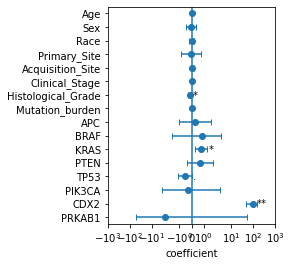

In [3]:
import bone
reload(bone)
df=df1
df = df.drop(['Intercept'])
#df = df.sort_values('pvalues',ascending=False)
plt.figure(figsize=(3,4))
ax = plt.subplot2grid((1, 1), (0, 0))
ax.errorbar(df["coeff"], range(len(df.index)),
    yerr=0,
    xerr=[list(df["coeff"] - df["lower 0.95"]), list(df["upper 0.95"] - df["coeff"])],
    fmt='o', capsize=3, color='tab:blue')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0, color='tab:blue')
plt.xscale('symlog')
ax.set_xlim([-1000, 1000])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.1,i, df['codes'][i], verticalalignment='center')
#ax.set_title("GSE122401")
pdf = getPDF("MV.pdf")
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [4]:
import bone
cfile = "KRAS_WT.txt"
df = pd.read_table(cfile)
labels, index = np.unique(df["Catalog #"], return_inverse=True)
#df['a'] = np.array(df['Age']).astype(float)
#df['key1'] = index
#df['a'] = np.array(df['Age']).astype(float)
df['Age'] = np.array(df['Age ']).astype(float)
l1, i1 = np.unique(df["Race"], return_inverse=True)
df["Race"] = i1 
df['CDX2'] = np.array(df['CDX2']).astype(float)
df['PRKAB1'] = np.array(df['PRKAB1']).astype(float)
#df['IC50'] = np.array(df['IC50']).astype(float)
l3, i3 = np.unique(df["Gender"], return_inverse=True)
df["Sex"] = i3 
l2, i2 = np.unique(df["Primary Site"], return_inverse=True)
df["Primary_Site"] = i2 
l3, i3 = np.unique(df["Acquisition Site"], return_inverse=True)
df["Acquisition_Site"] = i3 
l4, i4 = np.unique(df["APC"], return_inverse=True)
df["APC"] = i4 
#df['APC'] = np.array(df['APC']+10).astype(float)
l5, i5 = np.unique(df["BRAF"], return_inverse=True)
df["BRAF"] = i5 
#df['BRAF'] = np.array(df['BRAF']+10).astype(float)
l6, i6 = np.unique(df["KRAS"], return_inverse=True)
df["KRAS"] = i6 
#df['KRAS'] = np.array(df['KRAS']+10).astype(float)
l7, i7 = np.unique(df["TP53"], return_inverse=True)
df["TP53"] = i7 
#df['TP53'] = np.array(df['TP53']+10).astype(float)

l8, i8 = np.unique(df["PTEN"], return_inverse=True)
df["PTEN"] = i8
#df['PTEN'] = np.array(df['PTEN']+10).astype(float)

l9, i9 = np.unique(df["PIK3CA"], return_inverse=True)
df["PIK3CA"] = i9
#df['PIK3CA'] = np.array(df['PIK3CA']+10).astype(float)

l10, i10 = np.unique(df["IC50"], return_inverse=True)
df["IC50"] = i10
df['IC50'] = np.array(df['IC50']).astype(float)
#l4, i4 = np.unique(df["Clinical Stage Group"], return_inverse=True)
#df["Clinical_Stage"] = i4 
#l5, i5 = np.unique(df["Histological Grade"], return_inverse=True)
#df["Histological_Grade"] = i5 

df["Mutation_burden"] = np.array(df['# mutated genes']).astype(float)
#df['MG']
l11, i11 = np.unique(df["Histological Grade"], return_inverse=True)
df["Histological_Grade"] = i11
l12, i12 = np.unique(df["Clinical Stage Group"], return_inverse=True)
df["Clinical_Stage"] = i12
#df = df1
#df = df.drop(['Intercept'])
#df['Name'] = ['Age', 'Race', 'IC50', 'Gender']
#df["r"]
#df["HG"]
#df["HG"]
#df1
df6 = bone.printOLS("IC50 ~ CDX2", df)
#df6 = df6.iloc[1: , :]
#df6

                            OLS Regression Results                            
Dep. Variable:                   IC50   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     9.396
Date:                Sat, 12 Aug 2023   Prob (F-statistic):            0.00980
Time:                        12:02:45   Log-Likelihood:                -34.249
No. Observations:                  14   AIC:                             72.50
Df Residuals:                      12   BIC:                             73.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8931      0.926      5.286      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


,Name,coeff,lower 0.95,upper 0.95,pvalues,codes
CDX2,CDX2,628.149295,181.670728,1074.627862,0.009801,**
